In [1]:
import torch

In [2]:
# scalars are denoted with lowercase letters where as matrices with uppercase letters

In [3]:
A = torch.arange(6).reshape(3,2)
A

tensor([[0, 1],
        [2, 3],
        [4, 5]])

In [4]:
A.T # access the matrice's transpose, traponse is when we switch a matrice's row and columns.

tensor([[0, 2, 4],
        [1, 3, 5]])

In [5]:
B = torch.tensor([[1, 2, 3], [2, 0, 4], [3, 4, 5]]) # symmetric matrix
B.T == B

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

In [6]:
a = 2
X = torch.arange(24).reshape(2, 3, 4)
a + X, (a * X).shape # adding or multiplying a scalar and a tensor produces same shape result

(tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 torch.Size([2, 3, 4]))

In [7]:
# reduction sum

In [8]:
A.sum() # add all axes

tensor(15)

In [9]:
A = A.T
A.shape, A.sum(axis=0), A.sum(axis=1).shape

(torch.Size([2, 3]), tensor([1, 5, 9]), torch.Size([2]))

In [10]:
A.numel()

6

In [11]:
A.float().mean(), A.float().mean(axis=0), A.float().mean(axis=1)

(tensor(2.5000), tensor([0.5000, 2.5000, 4.5000]), tensor([2., 3.]))

In [12]:
# non reduction sum

In [13]:
sum_A = A.sum(axis=1, keepdims=True) # keeps numbers of axes unchanged
sum_A, sum_A.shape

(tensor([[6],
         [9]]),
 torch.Size([2, 1]))

In [14]:
A / sum_A

tensor([[0.0000, 0.3333, 0.6667],
        [0.1111, 0.3333, 0.5556]])

In [15]:
A

tensor([[0, 2, 4],
        [1, 3, 5]])

In [16]:
A.cumsum(axis=0), A.cumsum(axis=1), A

(tensor([[0, 2, 4],
         [1, 5, 9]]),
 tensor([[0, 2, 6],
         [1, 4, 9]]),
 tensor([[0, 2, 4],
         [1, 3, 5]]))

In [17]:
x = torch.arange(3, dtype=torch.float32)
y = torch.ones(3, dtype = torch.float32)
# dot product
x, y, torch.dot(x, y) # same as torch.sum(x * y)

(tensor([0., 1., 2.]), tensor([1., 1., 1.]), tensor(3.))

In [18]:
A, x

(tensor([[0, 2, 4],
         [1, 3, 5]]),
 tensor([0., 1., 2.]))

In [19]:
A.shape, x.shape

(torch.Size([2, 3]), torch.Size([3]))

In [20]:
torch.mv(A.float(), x), A.float()@x

(tensor([10., 13.]), tensor([10., 13.]))

In [21]:
B = torch.ones(3, 4)
A.shape, B.shape

(torch.Size([2, 3]), torch.Size([3, 4]))

In [22]:
torch.mm(A.float(), B.float()), A.float()@B.float()

(tensor([[6., 6., 6., 6.],
         [9., 9., 9., 9.]]),
 tensor([[6., 6., 6., 6.],
         [9., 9., 9., 9.]]))

In [23]:
#norms

In [24]:
u = torch.tensor([3.0, -4.0])
torch.norm(u), u

(tensor(5.), tensor([ 3., -4.]))

In [25]:
torch.abs(u).sum()

tensor(7.)

In [26]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
from d2l import torch as d2l

In [27]:
def f(x):
    return 3 * x ** 2 - 4 * x

for h in 10.0**np.arange(-1, -6, -1):
    print(f'h={h:.5f}, numerical limit={(f(1+h)-f(1))/h:.5f}')


h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


In [28]:
def use_svg_display(): #@save
    """Use the svg format to display a plot in Jupyter."""
    backend_inline.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)): #@save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel), axes.set_ylabel(ylabel)
    axes.set_xscale(xscale), axes.set_yscale(yscale)
    axes.set_xlim(xlim), axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()
    
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=[], xlim=None,
    ylim=None, xscale='linear', yscale='linear',
    fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    
    """Plot data points."""
    def has_one_axis(X): # True if X (tensor or list) has 1 axis
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
            and not hasattr(X[0], "__len__"))

    if has_one_axis(X): X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    set_figsize(figsize)
    if axes is None:
        axes = d2l.plt.gca()
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        axes.plot(x,y,fmt) if len(x) else axes.plot(y,fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)


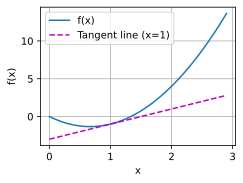

In [29]:
# plot the function u = f(x) and its tangent line y = 2x − 3 at x = 1, where the coefficient 2 is the slope of the tangent line.

x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

In [30]:
# automatic differentiation aka autograd ( backpropagation)
x = torch.arange(4.0)
x
# Can also create x = torch.arange(4.0, requires_grad=True)
x.requires_grad_(True)
x.grad # The gradient is None by default

In [31]:
y = 2 * torch.dot(x, x)
y

tensor(28., grad_fn=<MulBackward0>)

In [32]:
y.backward()
x.grad


tensor([ 0.,  4.,  8., 12.])

In [33]:
x.grad == 4 * x

tensor([True, True, True, True])

In [34]:
x.grad.zero_() # Reset the gradient
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

In [35]:
x.grad.zero_()
y = x * x
y.backward(gradient=torch.ones(len(y))) # Faster: y.sum().backward()
x.grad


tensor([0., 2., 4., 6.])

In [36]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x
z.sum().backward()
x.grad == u

tensor([True, True, True, True])

In [41]:
x, y, u, z, x.grad

(tensor([0., 1., 2., 3.], requires_grad=True),
 tensor([0., 1., 4., 9.], grad_fn=<MulBackward0>),
 tensor([0., 1., 4., 9.]),
 tensor([ 0.,  1.,  8., 27.], grad_fn=<MulBackward0>),
 tensor([0., 1., 4., 9.]))

In [42]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

In [43]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

In [44]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

In [45]:
a.grad == d / a

tensor(True)

In [46]:
# probability & stats

In [47]:
import random
from torch.distributions.multinomial import Multinomial

In [49]:
num_tosses = 100
heads = sum([random.random() > 0.5 for _ in range(100)])
tails = num_tosses - heads
print("heads, tails: ", [heads, tails])

heads, tails:  [41, 59]


In [52]:
fair_probs = torch.tensor([0.5, 0.5])
Multinomial(100, fair_probs).sample() / 100

tensor([0.5800, 0.4200])

In [53]:
counts = Multinomial(10000, fair_probs).sample() # as the number of repitions grows, etimates start converging (law of large numbers)
counts / 10000

tensor([0.4955, 0.5045])

In [54]:
counts = Multinomial(100000, fair_probs).sample()
counts / 100000

tensor([0.4990, 0.5010])

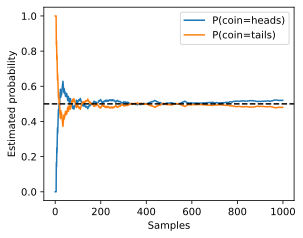

In [61]:
counts = Multinomial(1, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)
estimates = estimates.numpy()
d2l.set_figsize((4.5, 3.5))
d2l.plt.plot(estimates[:, 0], label=("P(coin=heads)"))
d2l.plt.plot(estimates[:, 1], label=("P(coin=tails)"))
d2l.plt.axhline(y=0.5, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Samples')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

In [ ]:
# documentation

In [62]:
print(dir(torch.distributions))

['AbsTransform', 'AffineTransform', 'Bernoulli', 'Beta', 'Binomial', 'CatTransform', 'Categorical', 'Cauchy', 'Chi2', 'ComposeTransform', 'ContinuousBernoulli', 'CorrCholeskyTransform', 'CumulativeDistributionTransform', 'Dirichlet', 'Distribution', 'ExpTransform', 'Exponential', 'ExponentialFamily', 'FisherSnedecor', 'Gamma', 'Geometric', 'Gumbel', 'HalfCauchy', 'HalfNormal', 'Independent', 'IndependentTransform', 'Kumaraswamy', 'LKJCholesky', 'Laplace', 'LogNormal', 'LogisticNormal', 'LowRankMultivariateNormal', 'LowerCholeskyTransform', 'MixtureSameFamily', 'Multinomial', 'MultivariateNormal', 'NegativeBinomial', 'Normal', 'OneHotCategorical', 'OneHotCategoricalStraightThrough', 'Pareto', 'Poisson', 'PowerTransform', 'RelaxedBernoulli', 'RelaxedOneHotCategorical', 'ReshapeTransform', 'SigmoidTransform', 'SoftmaxTransform', 'SoftplusTransform', 'StackTransform', 'StickBreakingTransform', 'StudentT', 'TanhTransform', 'Transform', 'TransformedDistribution', 'Uniform', 'VonMises', 'Weib

In [63]:
help(torch.ones) # how to get documentation for a function

Help on built-in function ones in module torch:

ones(...)
    ones(*size, *, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False) -> Tensor
    
    Returns a tensor filled with the scalar value `1`, with the shape defined
    by the variable argument :attr:`size`.
    
    Args:
        size (int...): a sequence of integers defining the shape of the output tensor.
            Can be a variable number of arguments or a collection like a list or tuple.
    
    Keyword arguments:
        out (Tensor, optional): the output tensor.
        dtype (:class:`torch.dtype`, optional): the desired data type of returned tensor.
            Default: if ``None``, uses a global default (see :func:`torch.set_default_tensor_type`).
        layout (:class:`torch.layout`, optional): the desired layout of returned Tensor.
            Default: ``torch.strided``.
        device (:class:`torch.device`, optional): the desired device of returned tensor.
            Default: if ``None

In [ ]:
# you can user '?' to create content that is like help(list) in new browser. using '??' will display code